In [1]:
import keras
#We have 60000 samples in the dataset

C:\Users\Brooks\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 8s 132us/step - loss: 0.2635 - acc: 0.9182 - val_loss: 0.0590 - val_acc: 0.9807
Epoch 2/6
60000/60000 [==============================] - 7s 119us/step - loss: 0.0912 - acc: 0.9734 - val_loss: 0.0499 - val_acc: 0.9835
Epoch 3/6
60000/60000 [==============================] - 7s 117us/step - loss: 0.0687 - acc: 0.9793 - val_loss: 0.0356 - val_acc: 0.9882
Epoch 4/6
60000/60000 [==============================] - 7s 119us/step - loss: 0.0558 - acc: 0.9834 - val_loss: 0.0337 - val_acc: 0.9890
Epoch 5/6
60000/60000 [==============================] - 7s 119us/step - loss: 0.0462 - acc: 0.9859 - val_loss: 0.0328 - val_acc: 0.9894
Epoch 6/6
60000/60000 [==============================] - 7s 119us/step - loss: 0.0420 - acc: 0.9875 - val_loss: 0.0298 - val_acc: 0.9895
Test loss: 0.02982671412997006
Test accuracy: 0.9895


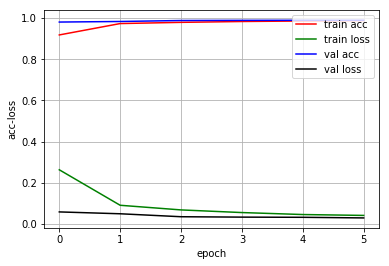

In [17]:
#Part A: Created a CNN 
#The structure of the CNN model is 
#In-->Conv-->Conv-->Maxpooling-->Dropout(0.25)-->Flatten-->ReLu--->Dropout(0.5)-->ReLu-->Out

#Use CNN to identify the MNIST dataset
#Acutally it take about 5min in macbook CPU
#But only 8s on NVIDIA 1060

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

#写一个LossHistory类，保存loss和acc
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()



########
batch_size = 128
#batch_size = 128
#We have 10 kind of number of hand writing numbers 
num_classes = 10
#epochs = 6
#in order to just take a test on the laptop 
#so I use the minimunm epoch to run the Deeplearning
#later I will run more epoches on GPU
epochs = 6
#12Epochs--it means that we have inport the whole data for 12 times

# input image dimensions
#the image is 28*28
img_rows, img_cols = 28, 28

# the data, split between train and test sets
#Here we can change the input data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

#Added a 2D Convolution an use the activation as relu
#with 32 out put
# the kernel is 3*3
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# add a 2d Convolution with 3*3 kernel and 64 output.
model.add(Conv2D(64, (3, 3), activation='relu'))
#Add a maxpooling with 2*2
model.add(MaxPooling2D(pool_size=(2, 2)))
#with 0.25 margin to Dropout 
model.add(Dropout(0.25))
#flat all the pixel--->28*28=784
model.add(Flatten())
#use fully connected and the activation is relu
model.add(Dense(128, activation='relu'))
#with 0.5 margin drop out
model.add(Dropout(0.5))
#use the softmax as the activation function
model.add(Dense(num_classes, activation='softmax'))

#And we have three Activate Layers in the network
#The first two layer is relu and the last layer os softmax;

#The cost function is categorical_crossentropy,
#And the Gradient Estimation function is Adadelta
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])




#创建一个实例history
history = LossHistory()

#迭代训练（注意这个地方要加入callbacks）
#Train the data;
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),callbacks=[history])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#绘制acc-loss曲线
history.loss_plot('epoch')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 8s 129us/step - loss: 0.2467 - acc: 0.9247 - val_loss: 0.0713 - val_acc: 0.9770
Epoch 2/6
60000/60000 [==============================] - 7s 119us/step - loss: 0.1018 - acc: 0.9692 - val_loss: 0.0735 - val_acc: 0.9786
Epoch 3/6
60000/60000 [==============================] - 7s 123us/step - loss: 0.0794 - acc: 0.9759 - val_loss: 0.0498 - val_acc: 0.9843
Epoch 4/6
60000/60000 [==============================] - 7s 119us/step - loss: 0.0664 - acc: 0.9800 - val_loss: 0.0443 - val_acc: 0.9847
Epoch 5/6
60000/60000 [==============================] - 7s 121us/step - loss: 0.0581 - acc: 0.9821 - val_loss: 0.0429 - val_acc: 0.9866
Epoch 6/6
60000/60000 [==============================] - 7s 119us/step - loss: 0.0520 - acc: 0.9843 - val_loss: 0.0477 - val_acc: 0.9850
Test loss: 0.04770497312827501
Test accuracy: 0.985


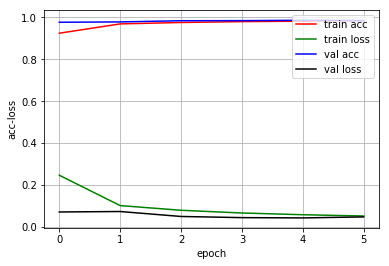

In [4]:
#Part B: Change the activate function 
#in the previous code we use ReLU in the conv layer
#in this part we try to use 'tanh' as the activate function 

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
#写一个LossHistory类，保存loss和acc
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()
batch_size = 128
#We have 10 kind of number of hand writing numbers 
num_classes = 10
#epochs = 12
#in order to just take a test on the laptop 
#so I use the minimunm epoch to run the Deeplearning
#later I will run more epoches on GPU
epochs = 6
#12Epochs--it means that we have inport the whole data for 12 times

# input image dimensions
#the image is 28*28
img_rows, img_cols = 28, 28

# the data, split between train and test sets
#Here we can change the input data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

#Added a 2D Convolution an use the activation as relu
#with 32 out put
# the kernel is 3*3
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='tanh',
                 input_shape=input_shape))
# add a 2d Convolution with 3*3 kernel and 64 output.
model.add(Conv2D(64, (3, 3), activation='tanh'))
#Add a maxpooling with 2*2
model.add(MaxPooling2D(pool_size=(2, 2)))
#with 0.25 margin to Dropout 
model.add(Dropout(0.25))
#flat all the pixel--->28*28=784
model.add(Flatten())
#use fully connected and the activation is relu
model.add(Dense(128, activation='tanh'))
#with 0.5 margin drop out
model.add(Dropout(0.5))
#use the softmax as the activation function
model.add(Dense(num_classes, activation='softmax'))

#Use crossEntropy as the loss function 
#And set the optimizer as Adadelta
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

#创建一个实例history
history = LossHistory()

#迭代训练（注意这个地方要加入callbacks）
#Train the data;
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),callbacks=[history])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#绘制acc-loss曲线
history.loss_plot('epoch')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 8s 131us/step - loss: 0.2284 - acc: 0.9309 - val_loss: 0.0893 - val_acc: 0.9711
Epoch 2/6
60000/60000 [==============================] - 8s 137us/step - loss: 0.0957 - acc: 0.9711 - val_loss: 0.0496 - val_acc: 0.9841
Epoch 3/6
60000/60000 [==============================] - 7s 122us/step - loss: 0.0768 - acc: 0.9759 - val_loss: 0.0426 - val_acc: 0.9867
Epoch 4/6
60000/60000 [==============================] - 7s 121us/step - loss: 0.0628 - acc: 0.9802 - val_loss: 0.0391 - val_acc: 0.9873
Epoch 5/6
60000/60000 [==============================] - 7s 119us/step - loss: 0.0533 - acc: 0.9837 - val_loss: 0.0429 - val_acc: 0.9869
Epoch 6/6
60000/60000 [==============================] - 8s 125us/step - loss: 0.0482 - acc: 0.9847 - val_loss: 0.0387 - val_acc: 0.9871
Test loss: 0.03871773919346124
Test accuracy: 0.9871


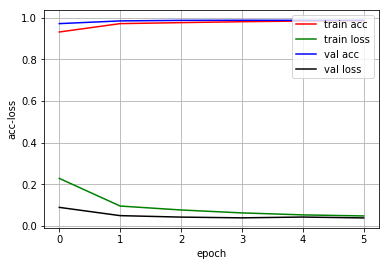

In [5]:
#Part B: Change the activate function 
#in the previous code we use tanh in the conv layer
#in this part we try to use 'elu' as the activate function 

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
#写一个LossHistory类，保存loss和acc
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

batch_size = 128
#We have 10 kind of number of hand writing numbers 
num_classes = 10
#epochs = 12
#in order to just take a test on the laptop 
#so I use the minimunm epoch to run the Deeplearning
#later I will run more epoches on GPU
epochs = 6
#12Epochs--it means that we have inport the whole data for 12 times

# input image dimensions
#the image is 28*28
img_rows, img_cols = 28, 28

# the data, split between train and test sets
#Here we can change the input data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

#Added a 2D Convolution an use the activation as relu
#with 32 out put
# the kernel is 3*3
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='elu',
                 input_shape=input_shape))
# add a 2d Convolution with 3*3 kernel and 64 output.
model.add(Conv2D(64, (3, 3), activation='elu'))
#Add a maxpooling with 2*2
model.add(MaxPooling2D(pool_size=(2, 2)))
#with 0.25 margin to Dropout 
model.add(Dropout(0.25))
#flat all the pixel--->28*28=784
model.add(Flatten())
#use fully connected and the activation is relu
model.add(Dense(128, activation='elu'))
#with 0.5 margin drop out
model.add(Dropout(0.5))
#use the softmax as the activation function
model.add(Dense(num_classes, activation='softmax'))

#Use crossEntropy as the loss function 
#And set the optimizer as Adadelta
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

#创建一个实例history
history = LossHistory()

#迭代训练（注意这个地方要加入callbacks）
#Train the data;
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),callbacks=[history])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#绘制acc-loss曲线
history.loss_plot('epoch')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 8s 127us/step - loss: 1.8053 - acc: 0.3454 - val_loss: 0.2693 - val_acc: 0.9197
Epoch 2/6
60000/60000 [==============================] - 7s 120us/step - loss: 0.3399 - acc: 0.8990 - val_loss: 0.1464 - val_acc: 0.9548
Epoch 3/6
60000/60000 [==============================] - 7s 117us/step - loss: 0.2277 - acc: 0.9328 - val_loss: 0.1371 - val_acc: 0.9683
Epoch 4/6
60000/60000 [==============================] - 7s 121us/step - loss: 0.1578 - acc: 0.9531 - val_loss: 0.0686 - val_acc: 0.9777
Epoch 5/6
60000/60000 [==============================] - 7s 118us/step - loss: 0.1256 - acc: 0.9642 - val_loss: 0.0560 - val_acc: 0.9818
Epoch 6/6
60000/60000 [==============================] - 7s 119us/step - loss: 0.1076 - acc: 0.9688 - val_loss: 0.0524 - val_acc: 0.9839
Test loss: 0.05243036327987538
Test accuracy: 0.9839


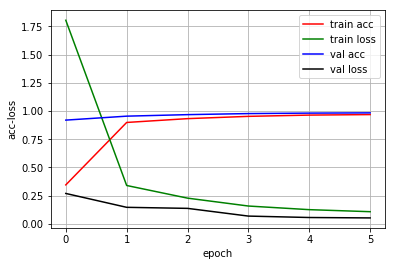

In [6]:
#Change the RuLU to softPlus and try to train it 

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
#写一个LossHistory类，保存loss和acc
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

batch_size = 128
#We have 10 kind of number of hand writing numbers 
num_classes = 10
#epochs = 12
#in order to just take a test on the laptop 
#so I use the minimunm epoch to run the Deeplearning
#later I will run more epoches on GPU
epochs = 6
#12Epochs--it means that we have inport the whole data for 12 times

# input image dimensions
#the image is 28*28
img_rows, img_cols = 28, 28

# the data, split between train and test sets
#Here we can change the input data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

#Added a 2D Convolution an use the activation as relu
#with 32 out put
# the kernel is 3*3
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='softplus',
                 input_shape=input_shape))
# add a 2d Convolution with 3*3 kernel and 64 output.
model.add(Conv2D(64, (3, 3), activation='softplus'))
#Add a maxpooling with 2*2
model.add(MaxPooling2D(pool_size=(2, 2)))
#with 0.25 margin to Dropout 
model.add(Dropout(0.25))
#flat all the pixel--->28*28=784
model.add(Flatten())
#use fully connected and the activation is relu
model.add(Dense(128, activation='softplus'))
#with 0.5 margin drop out
model.add(Dropout(0.5))
#use the softmax as the activation function
model.add(Dense(num_classes, activation='softmax'))

#Use crossEntropy as the loss function 
#And set the optimizer as Adadelta
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

#创建一个实例history
history = LossHistory()

#迭代训练（注意这个地方要加入callbacks）
#Train the data;
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),callbacks=[history])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#绘制acc-loss曲线
history.loss_plot('epoch')

In this training process I keep all the parameter but the activation changed from ReLu to tanh;
I found that Using ReLu the loss and the accuracy will be higher than using tanh;
But they do not have too much difference;
And then I try to use elu as the activation function; 
Also do not have too much difference, but I got a conclusion:
In this data set the performance of activation function:
The accuracy performance: ReLu>elu>tanh
And the Relu and elu are quickly the network plateaus.


But when I changed the active function to softplus, everything changed.
The loss at begining become become very large, however it drop quickly in the first epoch of the training. 


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 7s 125us/step - loss: 0.0172 - acc: 0.7456 - val_loss: 0.0059 - val_acc: 0.9212
Epoch 2/6
60000/60000 [==============================] - 7s 119us/step - loss: 0.0082 - acc: 0.8891 - val_loss: 0.0044 - val_acc: 0.9413
Epoch 3/6
60000/60000 [==============================] - 7s 117us/step - loss: 0.0069 - acc: 0.9084 - val_loss: 0.0039 - val_acc: 0.9489
Epoch 4/6
60000/60000 [==============================] - 7s 125us/step - loss: 0.0060 - acc: 0.9196 - val_loss: 0.0034 - val_acc: 0.9545
Epoch 5/6
60000/60000 [==============================] - 7s 122us/step - loss: 0.0055 - acc: 0.9272 - val_loss: 0.0031 - val_acc: 0.9587
Epoch 6/6
60000/60000 [==============================] - 7s 119us/step - loss: 0.0050 - acc: 0.9337 - val_loss: 0.0028 - val_acc: 0.9634
Test loss: 0.002812386189879908
Test accuracy: 0.9634


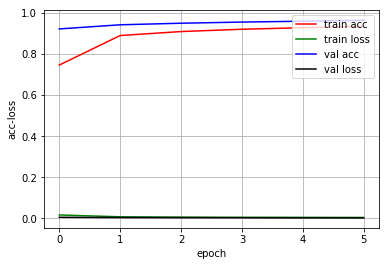

In [7]:
#Part C: try to use different costfunction: 
# In the prev training we use categorical_crossentropy as the cost function
#now change to MSE
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
#写一个LossHistory类，保存loss和acc
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

batch_size = 128
#We have 10 kind of number of hand writing numbers 
num_classes = 10
#epochs = 12
#in order to just take a test on the laptop 
#so I use the minimunm epoch to run the Deeplearning
#later I will run more epoches on GPU
epochs = 6
#12Epochs--it means that we have inport the whole data for 12 times

# input image dimensions
#the image is 28*28
img_rows, img_cols = 28, 28

# the data, split between train and test sets
#Here we can change the input data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

#Added a 2D Convolution an use the activation as relu
#with 32 out put
# the kernel is 3*3
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# add a 2d Convolution with 3*3 kernel and 64 output.
model.add(Conv2D(64, (3, 3), activation='relu'))
#Add a maxpooling with 2*2
model.add(MaxPooling2D(pool_size=(2, 2)))
#with 0.25 margin to Dropout 
model.add(Dropout(0.25))
#flat all the pixel--->28*28=784
model.add(Flatten())
#use fully connected and the activation is relu
model.add(Dense(128, activation='relu'))
#with 0.5 margin drop out
model.add(Dropout(0.5))
#use the softmax as the activation function
model.add(Dense(num_classes, activation='softmax'))

#Use crossEntropy as the loss function 
#And set the optimizer as Adadelta
model.compile(loss=keras.losses.mean_squared_logarithmic_error,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

#创建一个实例history
history = LossHistory()

#迭代训练（注意这个地方要加入callbacks）
#Train the data;
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),callbacks=[history])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#绘制acc-loss曲线
history.loss_plot('epoch')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 8s 128us/step - loss: 0.9380 - acc: 0.6459 - val_loss: 0.9177 - val_acc: 0.8263
Epoch 2/6
60000/60000 [==============================] - 7s 118us/step - loss: 0.9151 - acc: 0.8556 - val_loss: 0.9076 - val_acc: 0.9264
Epoch 3/6
60000/60000 [==============================] - 7s 118us/step - loss: 0.9116 - acc: 0.8890 - val_loss: 0.9068 - val_acc: 0.9337
Epoch 4/6
60000/60000 [==============================] - 7s 119us/step - loss: 0.9101 - acc: 0.9021 - val_loss: 0.9058 - val_acc: 0.9440
Epoch 5/6
60000/60000 [==============================] - 7s 120us/step - loss: 0.9092 - acc: 0.9114 - val_loss: 0.9054 - val_acc: 0.9468
Epoch 6/6
60000/60000 [==============================] - 7s 120us/step - loss: 0.9086 - acc: 0.9168 - val_loss: 0.9051 - val_acc: 0.9515
Test loss: 0.9050635167121888
Test accuracy: 0.9515


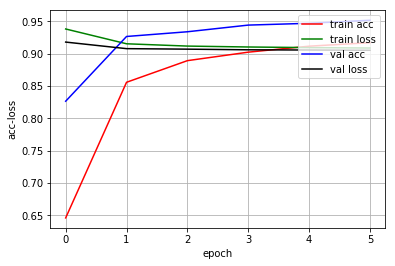

In [8]:
#Part C: try to use different costfunction: 
# In the prev training we use categorical_crossentropy as the cost function
#now change to Hinge
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
#写一个LossHistory类，保存loss和acc
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

batch_size = 128
#We have 10 kind of number of hand writing numbers 
num_classes = 10
#epochs = 12
#in order to just take a test on the laptop 
#so I use the minimunm epoch to run the Deeplearning
#later I will run more epoches on GPU
epochs = 6
#12Epochs--it means that we have inport the whole data for 12 times

# input image dimensions
#the image is 28*28
img_rows, img_cols = 28, 28

# the data, split between train and test sets
#Here we can change the input data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

#Added a 2D Convolution an use the activation as relu
#with 32 out put
# the kernel is 3*3
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# add a 2d Convolution with 3*3 kernel and 64 output.
model.add(Conv2D(64, (3, 3), activation='relu'))
#Add a maxpooling with 2*2
model.add(MaxPooling2D(pool_size=(2, 2)))
#with 0.25 margin to Dropout 
model.add(Dropout(0.25))
#flat all the pixel--->28*28=784
model.add(Flatten())
#use fully connected and the activation is relu
model.add(Dense(128, activation='relu'))
#with 0.5 margin drop out
model.add(Dropout(0.5))
#use the softmax as the activation function
model.add(Dense(num_classes, activation='softmax'))

#Use crossEntropy as the loss function 
#And set the optimizer as Adadelta
model.compile(loss=keras.losses.hinge,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

#创建一个实例history
history = LossHistory()

#迭代训练（注意这个地方要加入callbacks）
#Train the data;
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),callbacks=[history])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#绘制acc-loss曲线
history.loss_plot('epoch')

After compare this three lost function 
The accuracy : categorical_crossentropy>MSE>Hinge
And the speed to network plateaus: MSE> categorical_crossentropy>Hinge


And the loss is still very large when finish training while using the Hinge;

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 8s 127us/step - loss: 0.2618 - acc: 0.9199 - val_loss: 0.0583 - val_acc: 0.9825
Epoch 2/12
60000/60000 [==============================] - 7s 117us/step - loss: 0.0886 - acc: 0.9738 - val_loss: 0.0419 - val_acc: 0.9860
Epoch 3/12
60000/60000 [==============================] - 7s 119us/step - loss: 0.0671 - acc: 0.9800 - val_loss: 0.0388 - val_acc: 0.9869
Epoch 4/12
60000/60000 [==============================] - 7s 116us/step - loss: 0.0540 - acc: 0.9838 - val_loss: 0.0314 - val_acc: 0.9894
Epoch 5/12
60000/60000 [==============================] - 7s 120us/step - loss: 0.0480 - acc: 0.9860 - val_loss: 0.0318 - val_acc: 0.9899
Epoch 6/12
60000/60000 [==============================] - 7s 117us/step - loss: 0.0420 - acc: 0.9872 - val_loss: 0.0306 - val_acc: 0.9906
Epoch 7/12
60000/60000 [=========================

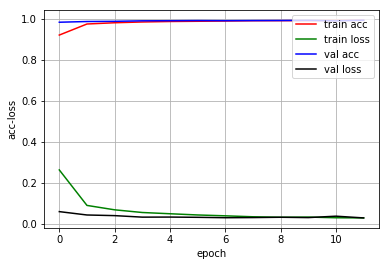

In [9]:
#Part D epoches 
#we train for 12 epoches so we can see the improve and difference bwtween each epoches

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
#写一个LossHistory类，保存loss和acc
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

batch_size = 128
#We have 10 kind of number of hand writing numbers 
num_classes = 10
epochs = 12
#in order to just take a test on the laptop 
#so I use the minimunm epoch to run the Deeplearning
#later I will run more epoches on GPU

#need to change the epoches, but I am not going to run it now
#epochs = 1
#12Epochs--it means that we have inport the whole data for 12 times

# input image dimensions
#the image is 28*28
img_rows, img_cols = 28, 28

# the data, split between train and test sets
#Here we can change the input data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

#Added a 2D Convolution an use the activation as relu
#with 32 out put
# the kernel is 3*3
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# add a 2d Convolution with 3*3 kernel and 64 output.
model.add(Conv2D(64, (3, 3), activation='relu'))
#Add a maxpooling with 2*2
model.add(MaxPooling2D(pool_size=(2, 2)))
#with 0.25 margin to Dropout 
model.add(Dropout(0.25))
#flat all the pixel--->28*28=784
model.add(Flatten())
#use fully connected and the activation is relu
model.add(Dense(128, activation='relu'))
#with 0.5 margin drop out
model.add(Dropout(0.5))
#use the softmax as the activation function
model.add(Dense(num_classes, activation='softmax'))

#Use crossEntropy as the loss function 
#And set the optimizer as Adadelta
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

#创建一个实例history
history = LossHistory()

#迭代训练（注意这个地方要加入callbacks）
#Train the data;
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),callbacks=[history])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#绘制acc-loss曲线
history.loss_plot('epoch')

From this chart, we can assume that in a proper range, the accuracy will increase with the training epoches; however sometimes it may overfit;

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 7s 115us/step - loss: 1.0427 - acc: 0.6722 - val_loss: 0.3219 - val_acc: 0.9110
Epoch 2/6
60000/60000 [==============================] - 6s 106us/step - loss: 0.4425 - acc: 0.8640 - val_loss: 0.2367 - val_acc: 0.9293
Epoch 3/6
60000/60000 [==============================] - 6s 106us/step - loss: 0.3643 - acc: 0.8890 - val_loss: 0.1974 - val_acc: 0.9442
Epoch 4/6
60000/60000 [==============================] - 7s 109us/step - loss: 0.3197 - acc: 0.9030 - val_loss: 0.1705 - val_acc: 0.9520
Epoch 5/6
60000/60000 [==============================] - 6s 105us/step - loss: 0.2910 - acc: 0.9134 - val_loss: 0.1540 - val_acc: 0.9539
Epoch 6/6
60000/60000 [==============================] - 6s 106us/step - loss: 0.2693 - acc: 0.9197 - val_loss: 0.1391 - val_acc: 0.9589
Test loss: 0.139126138459146
Test accuracy: 0.9589


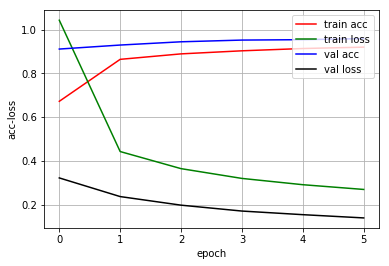

In [10]:
#Part E change the Gradient estimation 
#in the original code, we use adadelta
#at this point I decide to use SGD

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
#写一个LossHistory类，保存loss和acc
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

batch_size = 128
#We have 10 kind of number of hand writing numbers 
num_classes = 10
#epochs = 12
#in order to just take a test on the laptop 
#so I use the minimunm epoch to run the Deeplearning
#later I will run more epoches on GPU
epochs = 6
#12Epochs--it means that we have inport the whole data for 12 times

# input image dimensions
#the image is 28*28
img_rows, img_cols = 28, 28

# the data, split between train and test sets
#Here we can change the input data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

#Added a 2D Convolution an use the activation as relu
#with 32 out put
# the kernel is 3*3
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# add a 2d Convolution with 3*3 kernel and 64 output.
model.add(Conv2D(64, (3, 3), activation='relu'))
#Add a maxpooling with 2*2
model.add(MaxPooling2D(pool_size=(2, 2)))
#with 0.25 margin to Dropout 
model.add(Dropout(0.25))
#flat all the pixel--->28*28=784
model.add(Flatten())
#use fully connected and the activation is relu
model.add(Dense(128, activation='relu'))
#with 0.5 margin drop out
model.add(Dropout(0.5))
#use the softmax as the activation function
model.add(Dense(num_classes, activation='softmax'))

#Use crossEntropy as the loss function 
#And set the optimizer as Adadelta
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])

#创建一个实例history
history = LossHistory()

#迭代训练（注意这个地方要加入callbacks）
#Train the data;
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),callbacks=[history])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#绘制acc-loss曲线
history.loss_plot('epoch')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 7s 119us/step - loss: 0.2087 - acc: 0.9356 - val_loss: 0.0548 - val_acc: 0.9815
Epoch 2/6
60000/60000 [==============================] - 7s 113us/step - loss: 0.0799 - acc: 0.9761 - val_loss: 0.0379 - val_acc: 0.9876
Epoch 3/6
60000/60000 [==============================] - 7s 114us/step - loss: 0.0605 - acc: 0.9821 - val_loss: 0.0379 - val_acc: 0.9875
Epoch 4/6
60000/60000 [==============================] - 7s 112us/step - loss: 0.0491 - acc: 0.9855 - val_loss: 0.0410 - val_acc: 0.9877
Epoch 5/6
60000/60000 [==============================] - 7s 115us/step - loss: 0.0452 - acc: 0.9868 - val_loss: 0.0324 - val_acc: 0.9894
Epoch 6/6
60000/60000 [==============================] - 7s 114us/step - loss: 0.0454 - acc: 0.9862 - val_loss: 0.0394 - val_acc: 0.9878
Test loss: 0.0393611691005528
Test accuracy: 0.9878


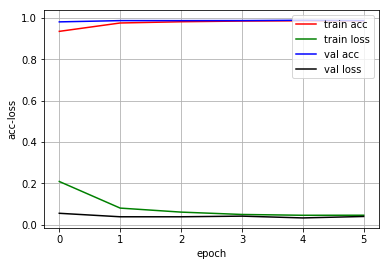

In [11]:
#Part E change the Gradient estimation 
#in the original code, we use adadelta
#at this point I decide to use RMSprop

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
#写一个LossHistory类，保存loss和acc
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

batch_size = 128
#We have 10 kind of number of hand writing numbers 
num_classes = 10
#epochs = 12
#in order to just take a test on the laptop 
#so I use the minimunm epoch to run the Deeplearning
#later I will run more epoches on GPU
epochs = 6
#12Epochs--it means that we have inport the whole data for 12 times

# input image dimensions
#the image is 28*28
img_rows, img_cols = 28, 28

# the data, split between train and test sets
#Here we can change the input data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

#Added a 2D Convolution an use the activation as relu
#with 32 out put
# the kernel is 3*3
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# add a 2d Convolution with 3*3 kernel and 64 output.
model.add(Conv2D(64, (3, 3), activation='relu'))
#Add a maxpooling with 2*2
model.add(MaxPooling2D(pool_size=(2, 2)))
#with 0.25 margin to Dropout 
model.add(Dropout(0.25))
#flat all the pixel--->28*28=784
model.add(Flatten())
#use fully connected and the activation is relu
model.add(Dense(128, activation='relu'))
#with 0.5 margin drop out
model.add(Dropout(0.5))
#use the softmax as the activation function
model.add(Dense(num_classes, activation='softmax'))

#Use crossEntropy as the loss function 
#And set the optimizer as Adadelta
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

#创建一个实例history
history = LossHistory()

#迭代训练（注意这个地方要加入callbacks）
#Train the data;
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),callbacks=[history])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#绘制acc-loss曲线
history.loss_plot('epoch')

How does it effect the accuracy?
The accuracy in this dataset :
Adadelta>RMSprop>>SGD
How does it effect how quickly the network plateaus?
Also Adadelta>RMSprop>>SGD
and if using SGD in this case, the loss is still very large compare to the other two gradient estimation 

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 5s 81us/step - loss: 0.3971 - acc: 0.8780 - val_loss: 0.1156 - val_acc: 0.9656
Epoch 2/6
60000/60000 [==============================] - 4s 71us/step - loss: 0.1776 - acc: 0.9466 - val_loss: 0.0818 - val_acc: 0.9743
Epoch 3/6
60000/60000 [==============================] - 4s 70us/step - loss: 0.1383 - acc: 0.9599 - val_loss: 0.0689 - val_acc: 0.9774
Epoch 4/6
60000/60000 [==============================] - 4s 71us/step - loss: 0.1190 - acc: 0.9648 - val_loss: 0.0596 - val_acc: 0.9811
Epoch 5/6
60000/60000 [==============================] - 4s 73us/step - loss: 0.1079 - acc: 0.9665 - val_loss: 0.0552 - val_acc: 0.9818
Epoch 6/6
60000/60000 [==============================] - 4s 71us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.0500 - val_acc: 0.9831
Test loss: 0.04999545450489968
Test accuracy: 0.9831


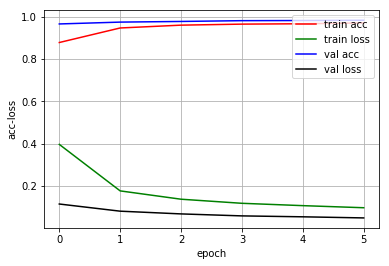

In [12]:
#Part F: in this part we reduce one convolution layer 
# and want to see what will happen
#At this part I removed one of the conv layer and rise the drop out rate to 0.5 in the first drop out layer

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
#写一个LossHistory类，保存loss和acc
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

batch_size = 128
#We have 10 kind of number of hand writing numbers 
num_classes = 10
#epochs = 12
#in order to just take a test on the laptop 
#so I use the minimunm epoch to run the Deeplearning
#later I will run more epoches on GPU
epochs = 6
#12Epochs--it means that we have inport the whole data for 12 times

# input image dimensions
#the image is 28*28
img_rows, img_cols = 28, 28

# the data, split between train and test sets
#Here we can change the input data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

#Added a 2D Convolution an use the activation as relu
#with 32 out put
# the kernel is 3*3
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
#with 0.25 margin to Dropout 
model.add(Dropout(0.5))
#flat all the pixel--->28*28=784
model.add(Flatten())
#use fully connected and the activation is relu
model.add(Dense(128, activation='relu'))
#with 0.5 margin drop out
model.add(Dropout(0.5))
#use the softmax as the activation function
model.add(Dense(num_classes, activation='softmax'))

#Use crossEntropy as the loss function 
#And set the optimizer as Adadelta
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

#创建一个实例history
history = LossHistory()

#迭代训练（注意这个地方要加入callbacks）
#Train the data;
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),callbacks=[history])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#绘制acc-loss曲线
history.loss_plot('epoch')

After remove one of the conv layer and rise the drop out rate to 0.5 in the first drop out layer
the accuracy is lower: from 98.95% to 98.32%
and the loss is hard to reach the plateaus.

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 8s 128us/step - loss: 0.2772 - acc: 0.9144 - val_loss: 0.0567 - val_acc: 0.9814
Epoch 2/6
60000/60000 [==============================] - 7s 117us/step - loss: 0.0911 - acc: 0.9729 - val_loss: 0.0485 - val_acc: 0.9843
Epoch 3/6
60000/60000 [==============================] - 7s 117us/step - loss: 0.0689 - acc: 0.9793 - val_loss: 0.0378 - val_acc: 0.9864
Epoch 4/6
60000/60000 [==============================] - 7s 117us/step - loss: 0.0585 - acc: 0.9824 - val_loss: 0.0311 - val_acc: 0.9896
Epoch 5/6
60000/60000 [==============================] - 7s 117us/step - loss: 0.0502 - acc: 0.9847 - val_loss: 0.0325 - val_acc: 0.9890
Epoch 6/6
60000/60000 [==============================] - 7s 119us/step - loss: 0.0449 - acc: 0.9864 - val_loss: 0.0337 - val_acc: 0.9888
Test loss: 0.03372563759292971
Test accuracy: 0.9888


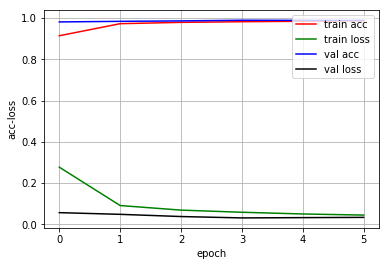

In [13]:
#Part G-Network initialization
#set the initializer in the first convolution layer

#the first one is zeros

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
#写一个LossHistory类，保存loss和acc
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

batch_size = 128
#We have 10 kind of number of hand writing numbers 
num_classes = 10
#epochs = 6
#in order to just take a test on the laptop 
#so I use the minimunm epoch to run the Deeplearning
#later I will run more epoches on GPU
epochs = 6
#12Epochs--it means that we have inport the whole data for 12 times

# input image dimensions
#the image is 28*28
img_rows, img_cols = 28, 28

# the data, split between train and test sets
#Here we can change the input data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

#Added a 2D Convolution an use the activation as relu
#with 32 out put

#keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', 
#data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, 
#kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None,
#bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)

# the kernel is 3*3
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape, kernel_initializer='random_uniform',
                bias_initializer='zeros'))
# add a 2d Convolution with 3*3 kernel and 64 output.
model.add(Conv2D(64, (3, 3), activation='relu'))
#Add a maxpooling with 2*2
model.add(MaxPooling2D(pool_size=(2, 2)))
#with 0.25 margin to Dropout 
model.add(Dropout(0.25))
#flat all the pixel--->28*28=784
model.add(Flatten())
#use fully connected and the activation is relu

model.add(Dense(128, activation='relu'))
#with 0.5 margin drop out
model.add(Dropout(0.5))
#use the softmax as the activation function
model.add(Dense(num_classes, activation='softmax'))

#Use crossEntropy as the loss function 
#And set the optimizer as Adadelta
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

#创建一个实例history
history = LossHistory()

#迭代训练（注意这个地方要加入callbacks）
#Train the data;
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),callbacks=[history])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#绘制acc-loss曲线
history.loss_plot('epoch')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 8s 129us/step - loss: 0.6193 - acc: 0.8006 - val_loss: 0.1263 - val_acc: 0.9611
Epoch 2/6
60000/60000 [==============================] - 7s 118us/step - loss: 0.1656 - acc: 0.9511 - val_loss: 0.0661 - val_acc: 0.9782
Epoch 3/6
60000/60000 [==============================] - 7s 117us/step - loss: 0.1174 - acc: 0.9646 - val_loss: 0.0566 - val_acc: 0.9806
Epoch 4/6
60000/60000 [==============================] - 7s 119us/step - loss: 0.0968 - acc: 0.9713 - val_loss: 0.0417 - val_acc: 0.9862
Epoch 5/6
60000/60000 [==============================] - 7s 118us/step - loss: 0.0854 - acc: 0.9744 - val_loss: 0.0411 - val_acc: 0.9860
Epoch 6/6
60000/60000 [==============================] - 7s 118us/step - loss: 0.0760 - acc: 0.9771 - val_loss: 0.0361 - val_acc: 0.9883
Test loss: 0.0361481190153514
Test accuracy: 0.9883


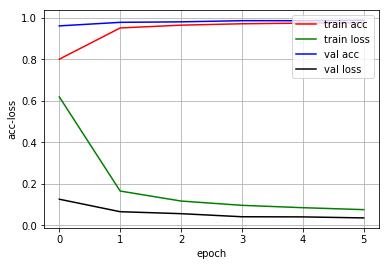

In [14]:
#Part G-Network initialization
#set the initializer in the first convolution layer


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
#写一个LossHistory类，保存loss和acc
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

batch_size = 128
#We have 10 kind of number of hand writing numbers 
num_classes = 10
#epochs = 6
#in order to just take a test on the laptop 
#so I use the minimunm epoch to run the Deeplearning
#later I will run more epoches on GPU
epochs = 6
#12Epochs--it means that we have inport the whole data for 12 times

# input image dimensions
#the image is 28*28
img_rows, img_cols = 28, 28

# the data, split between train and test sets
#Here we can change the input data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

#Added a 2D Convolution an use the activation as relu
#with 32 out put

#keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', 
#data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, 
#kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None,
#bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)

# the kernel is 3*3
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape, 
                 kernel_initializer='random_uniform',
                bias_initializer='ones'))
# add a 2d Convolution with 3*3 kernel and 64 output.
model.add(Conv2D(64, (3, 3), activation='relu'))
#Add a maxpooling with 2*2
model.add(MaxPooling2D(pool_size=(2, 2)))
#with 0.25 margin to Dropout 
model.add(Dropout(0.25))
#flat all the pixel--->28*28=784
model.add(Flatten())
#use fully connected and the activation is relu

model.add(Dense(128, activation='relu'))
#with 0.5 margin drop out
model.add(Dropout(0.5))
#use the softmax as the activation function
model.add(Dense(num_classes, activation='softmax'))

#Use crossEntropy as the loss function 
#And set the optimizer as Adadelta
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

#创建一个实例history
history = LossHistory()

#迭代训练（注意这个地方要加入callbacks）
#Train the data;
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),callbacks=[history])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#绘制acc-loss曲线
history.loss_plot('epoch')


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 8s 130us/step - loss: 0.2920 - acc: 0.9096 - val_loss: 0.0585 - val_acc: 0.9824
Epoch 2/6
60000/60000 [==============================] - 7s 118us/step - loss: 0.0941 - acc: 0.9719 - val_loss: 0.0408 - val_acc: 0.9864
Epoch 3/6
60000/60000 [==============================] - 7s 119us/step - loss: 0.0694 - acc: 0.9794 - val_loss: 0.0358 - val_acc: 0.9868
Epoch 4/6
60000/60000 [==============================] - 7s 117us/step - loss: 0.0573 - acc: 0.9828 - val_loss: 0.0338 - val_acc: 0.9880
Epoch 5/6
60000/60000 [==============================] - 7s 119us/step - loss: 0.0487 - acc: 0.9852 - val_loss: 0.0321 - val_acc: 0.9891
Epoch 6/6
60000/60000 [==============================] - 7s 119us/step - loss: 0.0450 - acc: 0.9864 - val_loss: 0.0324 - val_acc: 0.9902
Test loss: 0.032381766099089875
Test accuracy: 0.9902


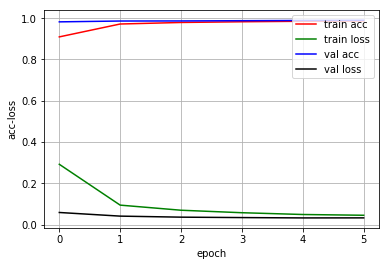

In [16]:
#Part G-Network initialization
#set the initializer in the first convolution layer
# kernel_initializer='RandomNormal',
# bias_initializer='zeros')

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt
#写一个LossHistory类，保存loss和acc
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

batch_size = 128
#We have 10 kind of number of hand writing numbers 
num_classes = 10
#epochs = 6
#in order to just take a test on the laptop 
#so I use the minimunm epoch to run the Deeplearning
#later I will run more epoches on GPU
epochs = 6
#12Epochs--it means that we have inport the whole data for 12 times

# input image dimensions
#the image is 28*28
img_rows, img_cols = 28, 28

# the data, split between train and test sets
#Here we can change the input data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()

#Added a 2D Convolution an use the activation as relu
#with 32 out put

#keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', 
#data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, 
#kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None,
#bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)

# the kernel is 3*3
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape, 
                 kernel_initializer='RandomNormal',
                bias_initializer='zeros'))
# add a 2d Convolution with 3*3 kernel and 64 output.
model.add(Conv2D(64, (3, 3), activation='relu'))
#Add a maxpooling with 2*2
model.add(MaxPooling2D(pool_size=(2, 2)))
#with 0.25 margin to Dropout 
model.add(Dropout(0.25))
#flat all the pixel--->28*28=784
model.add(Flatten())
#use fully connected and the activation is relu

model.add(Dense(128, activation='relu'))
#with 0.5 margin drop out
model.add(Dropout(0.5))
#use the softmax as the activation function
model.add(Dense(num_classes, activation='softmax'))

#Use crossEntropy as the loss function 
#And set the optimizer as Adadelta
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

#创建一个实例history
history = LossHistory()

#迭代训练（注意这个地方要加入callbacks）
#Train the data;
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),callbacks=[history])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#绘制acc-loss曲线
history.loss_plot('epoch')

After using the initializer :
# kernel_initializer='RandomNormal',
# bias_initializer='zeros')
The accuracy has rise from 0.9895 to 0.9902;

but when using the initializer as 
# kernel_initializer='random_uniform',
# bias_initializer='ones'))
it peforms not as good as the default setting.
